In [1]:
from core import *
import numpy as np
from time import time
import matplotlib.pyplot as plt

# 1. Linéarisation de $f$

## 1.2 Le dual $D(k)$

In [2]:
Z = [4, 7, 1, 3, 9, 2]
n = len(Z)

# On calcule la valeur objective de D(k) (qui est Lk(Z)) pour k de 1 à n
L = [resolve_1_2(Z, k) for k in range(1, n+1)]
print(f"L(Z) = {L}")

L(Z) = [1.0, 3.0, 6.0, 10.0, 17.0, 26.0]


## 1.4 Reformulation de l'exemple 1

In [3]:
coef = np.array([
    [5, 6, 4, 8, 1], # Les coefs des x pour z1
    [3, 8, 6, 2, 5]
])

W = [2, 1]
resolve_1_4(coef, W)

La valeur objective est 50.0
x1 = 0, x2 = 1, x3 = 1, x4 = 1, x5 = 0, 

Les dotations sont de (Z=) : (18, 16)


# 2. Application au partage équitable de biens indivisibles

## 2.1 Réformulation du problème en variables mixtes

In [4]:
coef = np.array(
    [[325, 225, 210, 115, 75, 50],
     [325, 225, 210, 115, 75, 50],
     [325, 225, 210, 115, 75, 50]])

In [5]:
W = [3, 2, 1]
print(f"Pour W = {W}\n")
resolve_2_1(coef, W)

Pour W = [3, 2, 1]

La valeur objective du PL est 1985.0

          x1 x2 x3 x4 x5 x6 
Agent_1 :  1  0  0  0  0  0 
Agent_2 :  0  1  0  1  0  0 
Agent_3 :  0  0  1  0  1  1 

Les dotations sont de (Z=) : (325, 340, 335)


In [6]:
W = [10, 3, 1]
print(f"Pour W = {W}\n")
resolve_2_1(coef, W)

Pour W = [10, 3, 1]

La valeur objective du PL est 4595.0

          x1 x2 x3 x4 x5 x6 
Agent_1 :  0  1  0  1  0  0 
Agent_2 :  1  0  0  0  0  0 
Agent_3 :  0  0  1  0  1  1 

Les dotations sont de (Z=) : (340, 325, 335)


In [7]:
print("Pour (z1 + z2 + z3) / 3\n")
W = [1/3, 1/3, 1/3]
resolve_2_1(coef, W)

Pour (z1 + z2 + z3) / 3

La valeur objective du PL est 333.33333333333337

          x1 x2 x3 x4 x5 x6 
Agent_1 :  0  0  0  0  0  0 
Agent_2 :  1  1  1  0  0  0 
Agent_3 :  0  0  0  1  1  1 

Les dotations sont de (Z=) : (0, 760, 240)


## 2.2 L'évolution du temps de résolution

In [8]:
N = [3, 5, 8, 13, 15, 18]
res_2 = np.zeros(len(N))

for i in range(len(N)):
    n = N[i]
    p = 2 * n
    
    for _ in range(10):
        U = np.random.randint(1, 100, size=(n, p))
        W = np.sort(np.random.choice(np.arange(1, 3*n), replace=False, size=n))[::-1]

        tic = time()
        resolve_2_1(U, W, verbose=False)
        tac = time()
        
        res_2[i] += tac - tic

In [9]:
res_2 = res_2 / 10
res_2

array([0.00419526, 0.0134213 , 0.11149557, 0.50972183, 1.06071665,
       3.43245344])

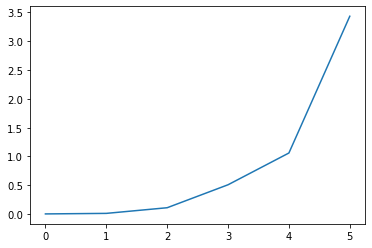

In [10]:
plt.plot(res_2)

# 3. Application à la selection multicritère

## 3.1 Réformulation du problème en variables mixtes

In [11]:
coef = np.array([
    [19,  6, 17,  2],
    [ 2, 11,  4, 18]])

C = [40, 50, 60, 50]

In [12]:
W = [2, 1]
print(f"Pour W = {W}\n")
resolve_3_1(coef, W, C)

Pour W = [2, 1]

La valeur objective est 60.99999999999999
x1 = 1, x2 = 0, x3 = 0, x4 = 1, 

Les dotations sont de (Z=) : (21, 20)


In [13]:
W = [10, 1]
print(f"Pour W = {W}\n")
resolve_3_1(coef, W, C)

Pour W = [10, 1]

La valeur objective est 221.0
x1 = 1, x2 = 0, x3 = 0, x4 = 1, 

Les dotations sont de (Z=) : (21, 20)


In [14]:
print("Pour (z1 + z2) / 2\n")
W = [1/2, 1/2]
resolve_3_1(coef, W, C)

Pour (z1 + z2) / 2

La valeur objective est 21.0
x1 = 1, x2 = 0, x3 = 1, x4 = 0, 

Les dotations sont de (Z=) : (36, 6)


## 3.2 L'évolution du temps de résolution

In [15]:
N = [2, 5, 10]
P = [5, 10, 15, 20]
res_3 = np.zeros((len(N), len(P)))

for  i in range(len(N)):
    n = N[i]
    
    for j in range(len(P)):
        p = P[j]
    
        for _ in range(10):
            U = np.random.randint(1, 100, size=(n, p))
            W = np.sort(np.random.choice(np.arange(1, 3*n), replace=False, size=n))[::-1]
            C = np.random.randint(1, 100, size=p)
            
            tic = time()
            resolve_3_1(U, W, C, verbose=False)
            tac = time()
                   
            res_3[i][j] += tac - tic

In [16]:
res_3 = res_3 / 10
res_3

array([[0.00251663, 0.00391061, 0.00422089, 0.00551171],
       [0.00566943, 0.00882323, 0.01301949, 0.01606162],
       [0.01642754, 0.02979059, 0.04290199, 0.05821707]])

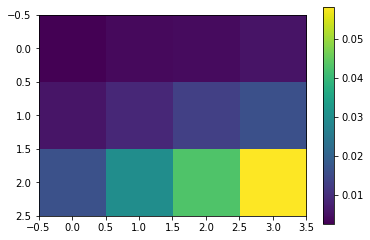

In [17]:
plt.imshow(res_3)
plt.colorbar()

# 4. Application d'un chemin robuste dans un graphe

## 4.1 Reformulation du problème

In [18]:
print("Pour le scénario 1")
T = np.array([
    [0, 5, 10, 2, 0, 0, 0],
    [0, 0, 4, 1, 4, 0, 0],
    [0, 0, 0, 0, 3, 1, 0],
    [0, 0, 1, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

resolve_4_1(T, 0, 6)

Pour le scénario 1

La valeur objective est 5.0

x_0_3
x_2_5
x_3_2
x_5_6


In [19]:
print("Pour le scénario 2")
T = np.array([
    [0, 3, 4, 6, 0, 0, 0],
    [0, 0, 2, 3, 6, 0, 0],
    [0, 0, 0, 0, 1, 2, 0],
    [0, 0, 4, 0, 0, 5, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

resolve_4_1(T, 0, 6)

Pour le scénario 2

La valeur objective est 6.0

x_0_2
x_2_4
x_4_6


In [20]:
T = np.array(
    [[
        [0, 5, 10, 2, 0, 0, 0],
        [0, 0, 4, 1, 4, 0, 0],
        [0, 0, 0, 0, 3, 1, 0],
        [0, 0, 1, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]
    ],

        [
        [0, 3, 4, 6, 0, 0, 0],
        [0, 0, 2, 3, 6, 0, 0],
        [0, 0, 0, 0, 1, 2, 0],
        [0, 0, 4, 0, 0, 5, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]
    ]])

W = [2, 1]
resolve_4_2(T, W, 0, 6)


La valeur objective est -30.0

x_0_1
x_1_2
x_2_5
x_5_6


Les temps des scénarios est de : (11, 8)


In [21]:
T_temp = np.array([
    [0, 3, 4, 6, 0, 0, 0],
    [0, 0, 2, 3, 6, 0, 0],
    [0, 0, 0, 0, 1, 2, 0],
    [0, 0, 4, 0, 0, 5, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

n = 2

res_4 = np.zeros((5, 20, n))
    
for i in range(20):

    T = []
    for _ in range(n):
        t = np.random.randint(1, 30, size=T_temp.shape)
        t[T_temp == 0] = 0
        T.append(t)

    T = np.array(T)
    
    for alpha in range(1, 6):
        W = generate_w(alpha, n)
        res_4[alpha - 1][i] = resolve_4_2(T, W, 0, 6, res=True)

In [22]:
res_4 = np.array(res_4)
X = res_4[:,:,0]
Y = res_4[:,:,1]

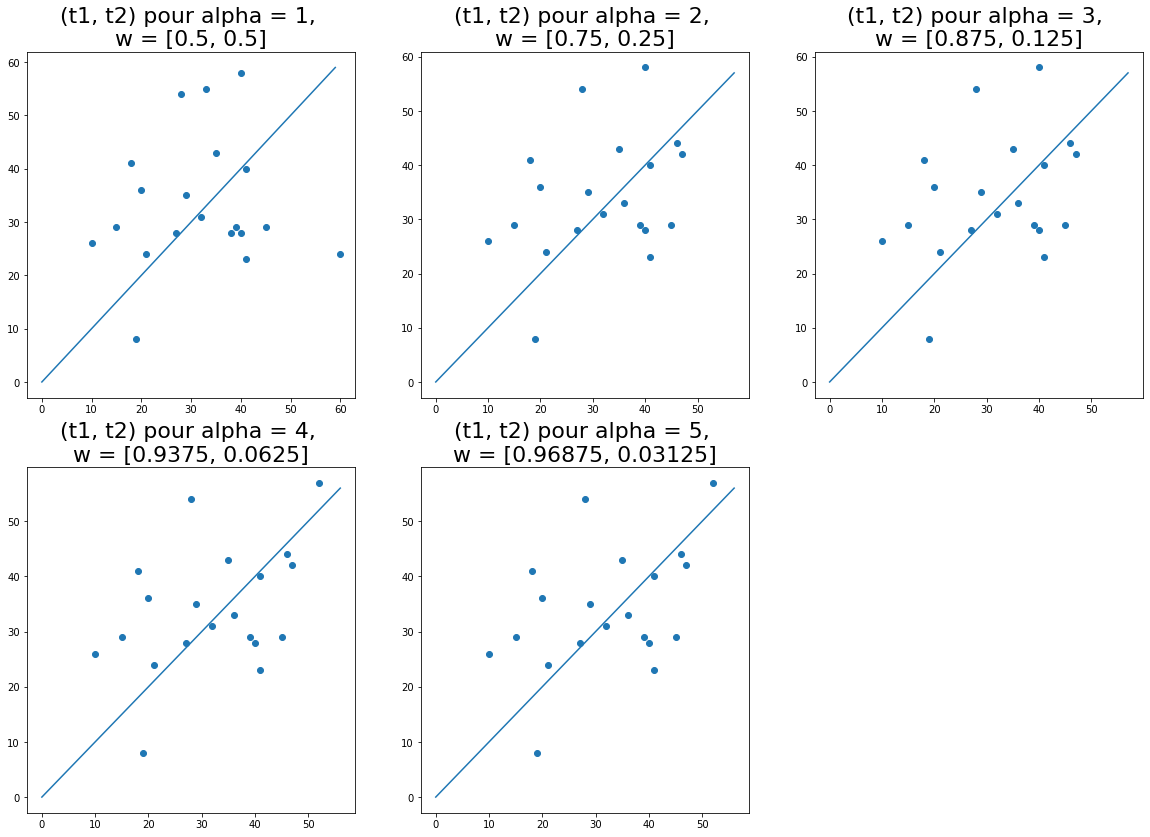

In [23]:
plt.figure(figsize=(20,14))

for i in range(1, 6):
    W = generate_w(i, n)
    plt.subplot(2,3,i)
    m = np.maximum(np.max(X[i-1]), np.max(Y[i-1]))
    plt.plot(np.arange(m), np.arange(m))
    plt.scatter(X[i-1], Y[i-1])
    plt.title(f"(t1, t2) pour alpha = {i}, \nw = {W}", fontsize=22)
    
plt.show()